In [2]:
from networking_utils import *
import networkit as nk
import random
from matplotlib import pyplot as plt
from math import sqrt, comb, factorial


# Intoduction

I don't really have much to try out here.

# Representation of Networks

## Matrices

In [3]:
G = example_graph()
Q = G.numberOfNodes()

plot_graph(G)
savefig("example.pdf", "figs", "matrices")
plt.close("all")

A = adjacency_matrix(G)
D = degree_matrix(G)
Q = laplacian_matrix(G)

u = np.ones(len(Q))
LV(D)
LV(A)
assert (A == A.T).all()
LV(Q)
assert (Q.dot(u) == 0).all()


[LOG]: Saved figure to ./figs/matrices/example.pdf
	 D                    : 
[[3. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 3.]]
	 A                    : 
[[0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 1. 0. 0. 1. 0.]]
	 Q                    : 
[[ 3. -1. -1.  0.  0. -1.]
 [-1.  4. -1.  0. -1. -1.]
 [-1. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0. -1.  0. -1.  3. -1.]
 [-1. -1.  0.  0. -1.  3.]]


## Linegraphs

In [4]:
def linegraph_stuff(G, title="general", N=4):
    plot_graph(G)
    savefig(f"{title}-{N}.pdf", "figs", "linegraph")
    A = adjacency_matrix(G)
    assert (A == A.T).all()

    lG = line_graph(G)
    plot_graph(lG)
    savefig(f"{title}-{N}-linegraph.pdf", "figs", "linegraph")
    
    cG = complement_graph(G)
    plot_graph(cG)
    savefig(f"{title}-{N}-complement.pdf", "figs", "linegraph")
    
    plt.close('all')


In [5]:
Q=8

LOG("Complete Graph")
G = complete_graph(Q)
linegraph_stuff(G, "complete", Q)

LOG("Star Graph")
G = star_graph(Q)
linegraph_stuff(G, "star", Q)

LOG("Ring Graph")
G = ring_graph(Q)
linegraph_stuff(G, "ring", Q)


[LOG]: Complete Graph
[LOG]: Saved figure to ./figs/linegraph/complete-8.pdf
[LOG]: Saved figure to ./figs/linegraph/complete-8-linegraph.pdf
[LOG]: Saved figure to ./figs/linegraph/complete-8-complement.pdf
[LOG]: Star Graph
[LOG]: Saved figure to ./figs/linegraph/star-8.pdf
[LOG]: Saved figure to ./figs/linegraph/star-8-linegraph.pdf
[LOG]: Saved figure to ./figs/linegraph/star-8-complement.pdf
[LOG]: Ring Graph
[LOG]: Saved figure to ./figs/linegraph/ring-8.pdf
[LOG]: Saved figure to ./figs/linegraph/ring-8-linegraph.pdf
[LOG]: Saved figure to ./figs/linegraph/ring-8-complement.pdf


# Graph Metrics

In [6]:
G = example_graph()
Q = G.numberOfNodes()
u = np.ones(Q)


L = G.numberOfEdges()

d_avg = avg_degree(G)
assert d_avg == 2*L/Q

LV(d_avg)


	 d_avg                :    3.00000


In [7]:
A  = adjacency_matrix(G)
degree_vector = A.dot(u)

LV(degree_vector)

uTd = u.T.dot(degree_vector)
LV(uTd)
LV(L)

A2 = A.dot(A)
LV(A2)
diagA2 = np.diag(A2)
LV(diagA2)
LV(degree_vector)

ccG = clustering_coefficient(G)
LV(ccG)


	 degree_vector        : 
[3. 4. 3. 2. 3. 3.]
	 uTd                  :   18.00000
	 L                    :    9.00000
	 A2                   : 
[[3. 2. 1. 1. 2. 1.]
 [2. 4. 1. 2. 1. 2.]
 [1. 1. 3. 0. 2. 2.]
 [1. 2. 0. 2. 0. 1.]
 [2. 1. 2. 0. 3. 1.]
 [1. 2. 2. 1. 1. 3.]]
	 diagA2               : 
[3. 4. 3. 2. 3. 3.]
	 degree_vector        : 
[3. 4. 3. 2. 3. 3.]
0
1
	 ccG                  :    0.47368


In [8]:
G = complete_graph(4)
ccG = clustering_coefficient(G)
LV(ccG)


0
1
	 ccG                  :    1.00000


In [9]:
G = example_graph()

H, rho = hopcount_matrix_diameter(G)
LV(H)
LV(rho)


	 H                    : 
[[0 1 1 0 0 1]
 [1 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 1 0 0 1 0]]
	 rho                  :    2.00000


### Menger's theorem

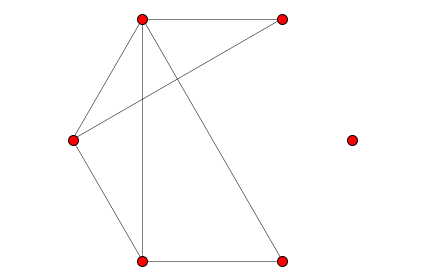

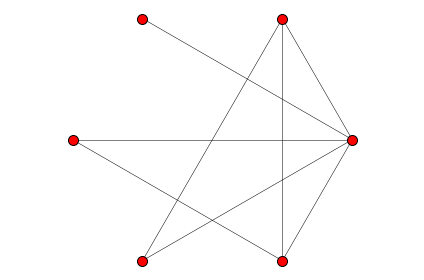

In [10]:
G = example_graph()
# G.removeEdge()
G.removeEdge(2, 3)
G.removeEdge(3,4)

plot_graph(G)
G.checkConsistency()

cG = complement_graph(G)
plot_graph(cG)


[LOG]: Saved figure to ./figs/heart/heart1000.pdf


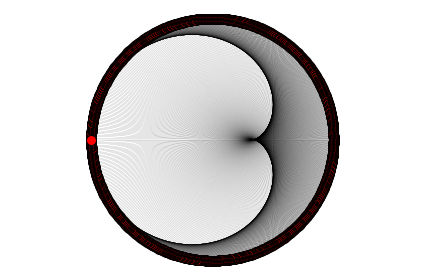

In [11]:
Q = 1000
G = heart_graph(Q)
plot_graph(G, show_labels=False, linewidth=0.1)
savefig(f"heart{Q}.pdf", "figs", "heart")


## Spectrum

In [12]:
G = example_graph()
Q = G.numberOfNodes()

A = adjacency_matrix(G)
lambdas, X = np.linalg.eig(A)
X = X.round(10)

LV(lambdas)
LV(X)

XXT = X.dot(X.T).round(10)
LV(XXT)

Xi = X * X
Xilam = Xi.dot(lambdas).round(10)

LV(Xilam)

Xirank = np.linalg.matrix_rank(Xi)
LV(Xirank)
LV(Q)

triang = (lambdas * lambdas * lambdas).sum() / 6
LV(triang)

aG = algebraic_connectivity(G)
LV(aG)


	 lambdas              : 
[ 3.11490754  0.74589831  0.61803399 -0.86080585 -1.61803399 -2.        ]
	 X                    : 
[[-0.42937435 -0.35054183 -0.37174803  0.43904224  0.60150096 -0.        ]
 [-0.52296601 -0.190443   -0.         -0.66350434  0.         -0.5       ]
 [-0.38512104  0.27951628 -0.60150096 -0.15346803 -0.37174803  0.5       ]
 [-0.24727606  0.74947556  0.          0.35656828 -0.         -0.5       ]
 [-0.38512104  0.27951628  0.60150096 -0.15346803  0.37174803  0.5       ]
 [-0.42937435 -0.35054183  0.37174803  0.43904224 -0.60150096  0.        ]]
	 XXT                  : 
[[ 1.  0. -0.  0. -0. -0.]
 [ 0.  1. -0. -0. -0.  0.]
 [-0. -0.  1. -0. -0. -0.]
 [ 0. -0. -0.  1. -0.  0.]
 [-0. -0. -0. -0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]]
	 Xilam                : 
[ 1.e-10 -1.e-10 -1.e-10 -0.e+00 -1.e-10  1.e-10]
	 Xirank               :    4.00000
	 Q                    :    6.00000
	 triang               :    3.00000
	 aG                   :    1.69722


### Gerschgorin 

drawing circle
drawing circle
drawing circle
drawing circle
drawing circle
	 M                    : 
[[0.15218996 0.87128533 0.17646596 0.92226311 0.39820548]
 [0.45422277 0.71625441 0.45506656 0.86719461 0.47722819]
 [0.03389386 0.43311932 0.72146051 0.61492507 0.27387961]
 [0.08666032 0.58941502 0.12264036 0.65068693 0.82157882]
 [0.80725877 0.00426329 0.60393547 0.98605063 0.22371902]]
	 d                    : 
[0.15218996 0.71625441 0.72146051 0.65068693 0.22371902]


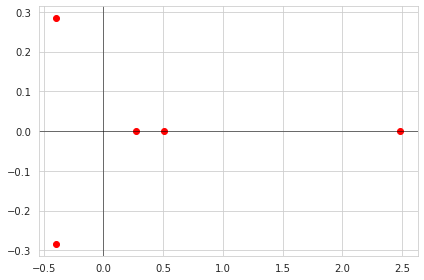

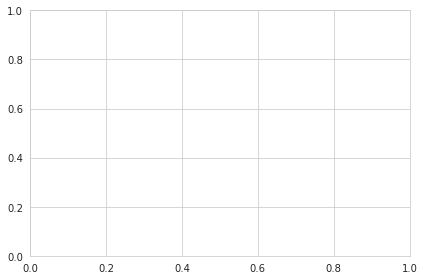

In [13]:
Q = 5
M = np.random.rand(Q, Q)

fig = plot_eigenvalues(M)
plot_gerschgorin_circles(M, fig=fig)

LV(M)
d = np.diag(M, k=0)
LV(d)


### Connectivity

In [14]:
G = nk.Graph(8)
G.addEdge(0, 1)
G.addEdge(1, 2)
G.addEdge(2, 3)
G.addEdge(3, 0)
G.addEdge(4, 5)
G.addEdge(5, 6)
G.addEdge(6, 7)
G.addEdge(7, 4)

aG1 = algebraic_connectivity(G)
plot_graph(G, aG1=aG1)
savefig("G1.pdf", "figs", "spectrum")

G.addEdge(0, 7)
aG2 = algebraic_connectivity(G)
plot_graph(G, aG2=aG2)
savefig("G2.pdf", "figs", "spectrum")

G.addEdge(3, 4)
aG3 = algebraic_connectivity(G)
plot_graph(G, aG3=aG3)
savefig("G3.pdf", "figs", "spectrum")

plt.close("all")


[LOG]: Saved figure to ./figs/spectrum/G1.pdf
[LOG]: Saved figure to ./figs/spectrum/G2.pdf
[LOG]: Saved figure to ./figs/spectrum/G3.pdf


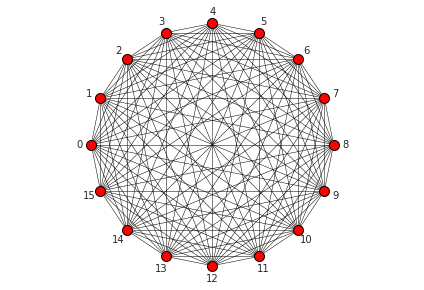

In [15]:
G = complete_graph(16)
plot_graph(G, show_labels=True)
# plot_graph(G, shape="random")



[LOG]: Saved figure to ./figs/random/er300-0.008.pdf
[LOG]: Saved figure to ./figs/random/er300-0.008.png


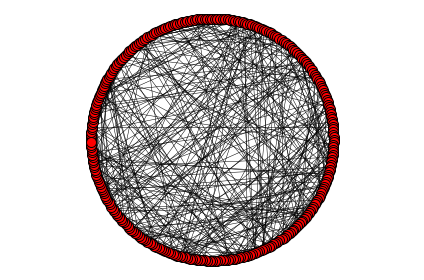

In [16]:

G = erdos_renyi_graph(300, 0.008)
plot_graph(G)
savefig("er300-0.008.pdf", "figs", "random")
savefig("er300-0.008.png", "figs", "random", dpi=500)


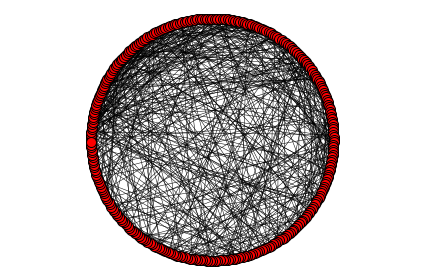

In [17]:
G = barabasi_albert_graph(300, 2)


plot_graph(G)


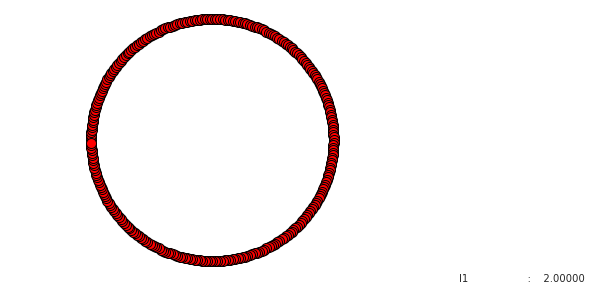

In [18]:
G = ring_graph(300)

A = adjacency_matrix(G)
lambdas, X = np.linalg.eig(A)
lambdas = np.sort(lambdas)[::-1]
plot_graph(G, l1 = lambdas[0])


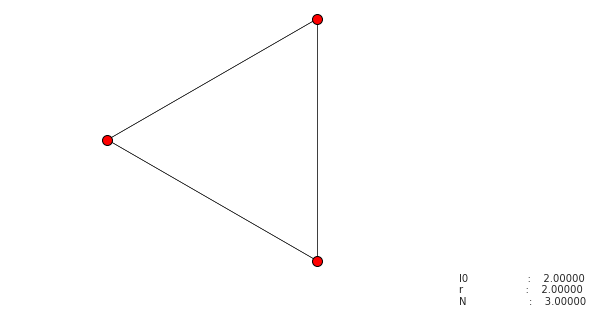

In [19]:
Q = 3
r = 2
G = regular_graph(Q, r)
A = adjacency_matrix(G)
lambdas, X = np.linalg.eig(A)
lambdas = np.sort(lambdas)[::-1]   
plot_graph(G, l0 = lambdas[0], r=r, N=Q)


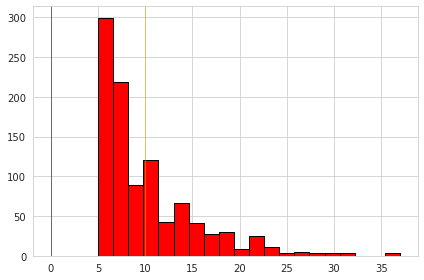

In [20]:
# G = example_graph()
# plot_degree_distribution(G)

G = barabasi_albert_graph(1000, 5)
# G = erdos_renyi_graph(1000, 0.1)

plot_degrees(G, bins=20)


False


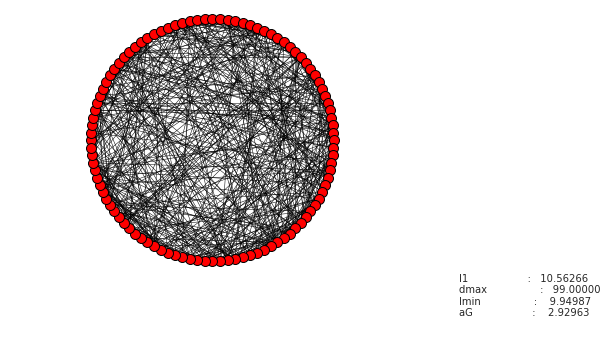

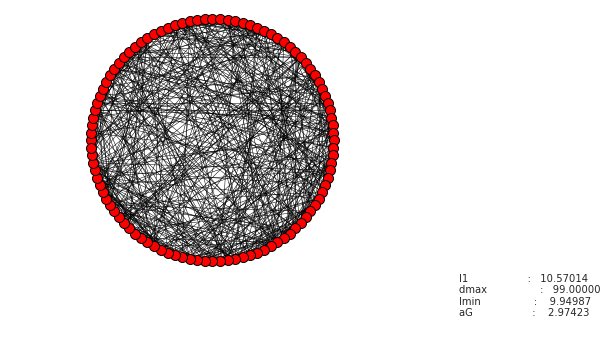

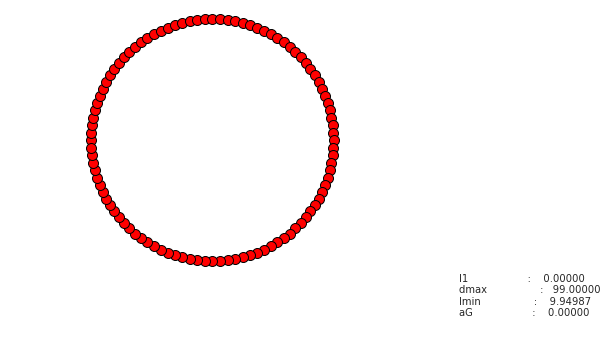

In [21]:

random.seed(42)
Q=100
G = erdos_renyi_graph(Q,0.1)
# G = ring_graph(N)
print(G.hasEdge(0,1))
plot_graph(G, l1=spectral_radius(G), dmax = Q-1, lmin = sqrt(Q-1), aG=algebraic_connectivity(G))
G.addEdge(0,1)
plot_graph(G, l1=spectral_radius(G), dmax = Q-1, lmin = sqrt(Q-1), aG=algebraic_connectivity(G))
G.removeAllEdges()
plot_graph(G, l1=spectral_radius(G), dmax = Q-1, lmin = sqrt(Q-1), aG=algebraic_connectivity(G))


In [22]:
G = erdos_renyi_graph(100, 0.1)

l1 = spectral_radius(G)

LV(l1)


	 l1                   :   10.78236


	 H                    : 
[[0 1 1 0 0 1]
 [1 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 1 0 0 1 0]]
	 EH                   :    0.60000
	 rho                  :    2.00000


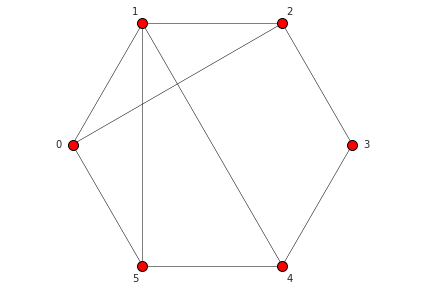

In [23]:
G = example_graph()
H, rho = hopcount_matrix_diameter(G)
EH = average_hopcount(G)
plot_graph(G, show_labels=True)
LV(H)
LV(EH)
LV(rho)


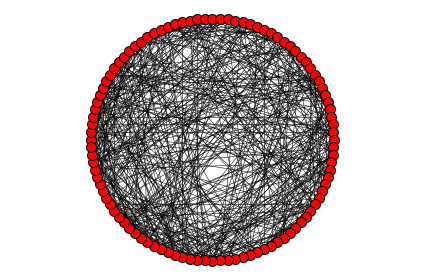

In [24]:
Q = 100
p = 0.1
samples = 1

rhos = np.zeros(samples)
EHs = np.zeros(samples)
for i in range(samples):
    G = erdos_renyi_graph(Q, p)
    # H, rho = hopcount_matrix_diameter(G)
#     rhos[i] = rho
#     EHs[i] = H.sum() / (N * (N-1))
    
# plt.hist(rhos, bins=20)
plot_graph(G, show_labels=False)


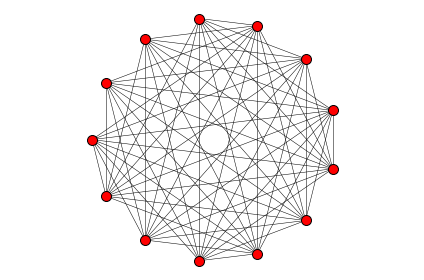

In [25]:
G = example_graph()
G = turan_graph(13, 4)
plot_graph(G)


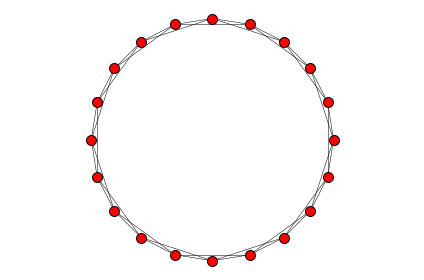

In [26]:
G = regular_graph(20, 2)
plot_graph(G)  


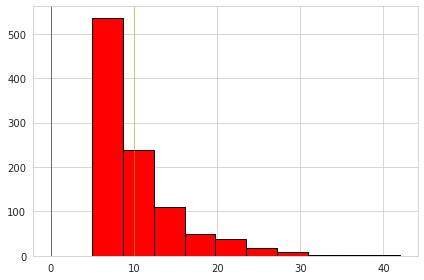

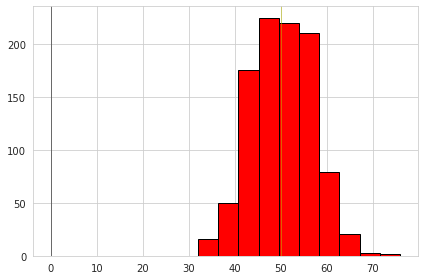

In [27]:
G = barabasi_albert_graph(1000, 5)
plot_degrees(G)

G = erdos_renyi_graph(1000, 0.05)
plot_degrees(G)


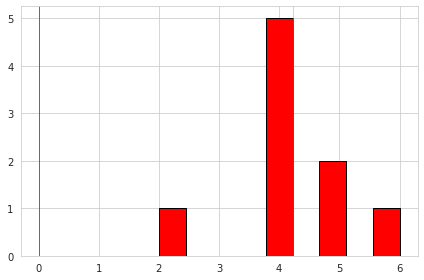

In [28]:
G = erdos_renyi_graph(9, 0.5)
plot_degrees(G, bins=9)


	 mu                   : 
[-2.22044605e-16+0.00000000e+00j  1.00000000e+01+0.00000000e+00j
  1.00000000e+01+0.00000000e+00j  1.00000000e+01-7.02166694e-16j
  1.00000000e+01+0.00000000e+00j  1.00000000e+01+0.00000000e+00j
  1.00000000e+01+0.00000000e+00j  1.00000000e+01+0.00000000e+00j
  1.00000000e+01+0.00000000e+00j  1.00000000e+01+7.02166694e-16j]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


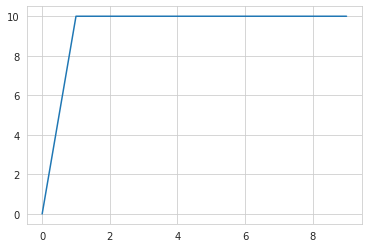

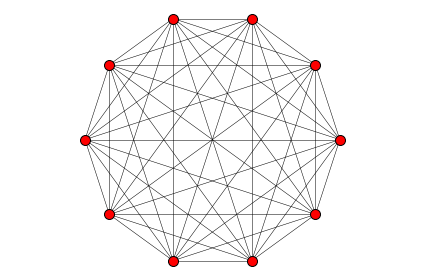

In [29]:
Q = 10
G = complete_graph(Q)
Q = laplacian_matrix(G)
mu, Z = np.linalg.eig(Q)
mu.sort()
LV(mu)
plt.plot(mu)
plot_graph(G)


In [30]:
B =  - np.array([[-1,0,0,0,-1], [1,-1,0,-1,0], [0,1,-1,0,0], [0,0,1,1,1]])
x = np.array([[2,0,0,-2]]).T
B.sum(axis=1)
Q = B.dot(B.T)
LV(Q)

D = np.diag(np.abs(B).sum(axis=1))

LV(D)
LV(x)

Qlim = Q[:3, :3]
xlim = x[:3]
LV(Qlim)
LV(xlim)

vlim = np.linalg.solve(Qlim, xlim)
LV(vlim)

v = np.vstack((vlim,[0]))
LV(v)

y = B.T.dot(v)
y4 = 4* y
LV(y4)




	 Q                    : 
[[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]
	 D                    : 
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]
	 x                    : 
[[ 2]
 [ 0]
 [ 0]
 [-2]]
	 Qlim                 : 
[[ 2 -1  0]
 [-1  3 -1]
 [ 0 -1  2]]
	 xlim                 : 
[[2]
 [0]
 [0]]
	 vlim                 : 
[[1.25]
 [0.5 ]
 [0.25]]
	 v                    : 
[[1.25]
 [0.5 ]
 [0.25]
 [0.  ]]
	 y4                   : 
[[3.]
 [1.]
 [1.]
 [2.]
 [5.]]


In [31]:
B =  - np.array([[-1,0,0,0,-1], [1,-1,0,-1,0], [0,1,-1,0,0], [0,0,1,1,1]])
x = np.array([[2,0,0,-2]]).T

Q = B.dot(B.T)
# Qdag = pseudo_inverse(Q)
# LV(Qdag)


mus, Z = np.linalg.eig(Q)
Qd = pseudo_inverse(Q)
Qd16 = 16 * Qd


LV(Qd)
LV(Qd16)

Omega = effective_resistance(Qd)
LV(Omega)

Omega8 = Omega * 8
LV(Omega8)


	 Qd                   : 
[[ 0.3125 -0.0625 -0.1875 -0.0625]
 [-0.0625  0.1875 -0.0625 -0.0625]
 [-0.1875 -0.0625  0.3125 -0.0625]
 [-0.0625 -0.0625 -0.0625  0.1875]]
	 Qd16                 : 
[[ 5. -1. -3. -1.]
 [-1.  3. -1. -1.]
 [-3. -1.  5. -1.]
 [-1. -1. -1.  3.]]
	 Omega                : 
[[0.    0.625 1.    0.625]
 [0.625 0.    0.625 0.5  ]
 [1.    0.625 0.    0.625]
 [0.625 0.5   0.625 0.   ]]
	 Omega8               : 
[[0. 5. 8. 5.]
 [5. 0. 5. 4.]
 [8. 5. 0. 5.]
 [5. 4. 5. 0.]]


	 connected            :    1.00000
	 Omega                : 
[[0.         0.24651467 0.28079456 0.24246866 0.25772243 0.28998399
  0.23844631 0.22449094 0.20474578 0.18808219 0.2613066  0.3115472
  0.21931419 0.25177582 0.19750609 0.26715038 0.27834658 0.20173555
  0.22327035 0.21357109]
 [0.24651467 0.         0.2647799  0.20403365 0.22130157 0.27514873
  0.22535779 0.20787453 0.19114978 0.17598145 0.22133484 0.29448125
  0.23765173 0.21193957 0.20226193 0.25437031 0.26431335 0.19316907
  0.20992841 0.22656322]
 [0.28079456 0.2647799  0.         0.23240718 0.28950748 0.30222588
  0.251719   0.27050863 0.24751726 0.20654695 0.24702683 0.33000126
  0.24015515 0.24245411 0.24123397 0.27814512 0.30247435 0.24747389
  0.24460555 0.22909374]
 [0.24246866 0.20403365 0.23240718 0.         0.23762851 0.22648314
  0.23986899 0.20273983 0.2011099  0.16630581 0.23599552 0.25257146
  0.22355733 0.19933329 0.17740399 0.21451032 0.25498061 0.20546326
  0.18064089 0.21119231]
 [0.25772243 0.22130157

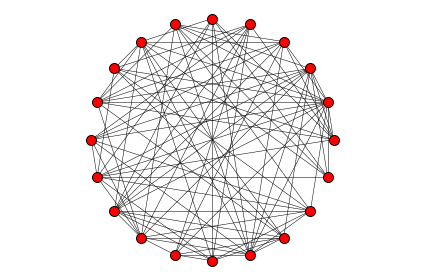

In [32]:
Q = 20

# G = complete_graph(N)
G = erdos_renyi_graph(Q, 0.5)
connected = is_connected(G)
LV(connected)
plot_graph(G)
Omega = effective_resistance_G(G)

LV(Omega)




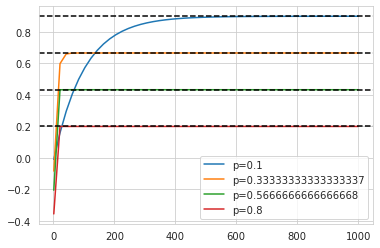

In [33]:

Q = np.linspace(1, 1000)

for p in np.linspace(0.1,0.8, 4):
    P = (1 - p) * (1 - (1 - p * p) ** (Q-2))
    plt.plot(Q, P, label=f"p={p}")
    plt.axhline(1-p, color="black", linestyle="dashed")
plt.legend()


0.0
36.0
48.0
144


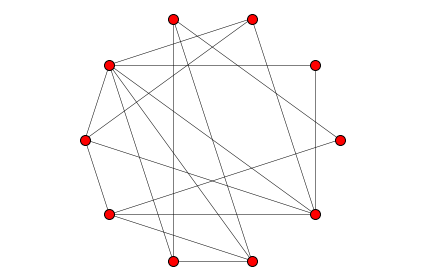

In [34]:

Q = 10
L =18
G = erdos_renyi_graph_L(Q, L)
plot_graph(G)

assert is_connected(G)

H, rho = hopcount_matrix_diameter(G)
H1 = (H == 1).sum() / L
H2 = (H == 2).sum()


A = adjacency_matrix(G)
A2 = A.dot(A)
A3 = A2.dot(A)

d = degrees_G(G)

print(np.trace(A))
print(np.trace(A2))
print(np.trace(A3))
print((d.T).dot(d))


In [35]:
Q = 1000
p1 = 0.5
p2 = 0.6
p3 = p1 + p2 -  2 * p1 * p2
# p3 = p1 * p2
# p3 = p1 + p2
# p3 = 1

G1 = erdos_renyi_graph(Q, p1)
G2 = erdos_renyi_graph(Q, p2)

GU = graph_union(G1, G2)

print(GU.numberOfEdges())
print(comb(Q, 2) * p3)


399939
249750.00000000006


In [36]:
B = np.array([
    [1, 0 , 1, 0, 0],
    [-1, 1, 0, 1, 0],
    [0, -1, 0, 0, 1],
    [0, 0, -1, -1, -1]])

rl = np.array([5, 5, 5, 4, 5])
Q = B.dot(1/rl * np.identity(5)).dot(B.T)

Qd = pseudo_inverse(Q)

pmax = 0
for i in range(4):
    for j in range(i, 4):
        x = np.zeros(4)
        x[i] = 1
        x[j] = -1

        p = x.T.dot(Qd).dot(x)
        if p > pmax:
            print(i, j)
            LV(p)
            pmax = p


0 0
	 p                    :    1.56250
0 1
	 p                    :    3.05556
0 2
	 p                    :    5.00000


100.00000000000044
5.867230765522056e-14


array([5.86723077e-14+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
       1.00000000e+02+0.00000000e+00j, 1.00000000e+02+0.00000000e+00j,
      

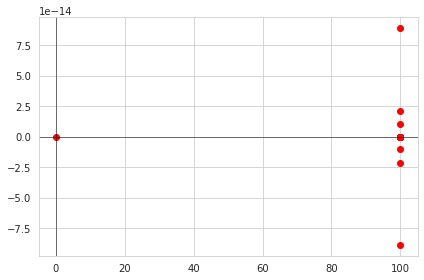

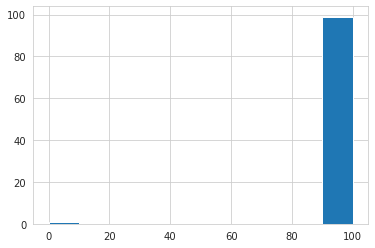

In [37]:
Q=100
# G = star_graph(N)
G = complete_graph(Q)
Q = laplacian_matrix(G)
mu, Z = np.linalg.eig(Q)
mu.sort()
plot_eigenvalues(Q)
plt.figure()
mureal = np.array([m.real for m in mu])
plt.hist(mureal)

print(mureal.max())
print(mureal.min())

mu



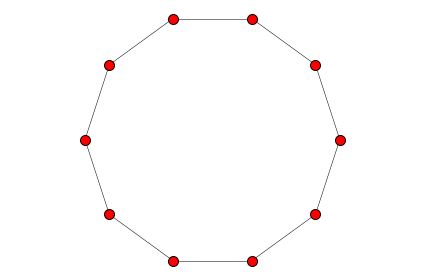

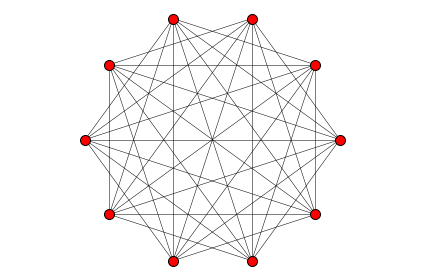

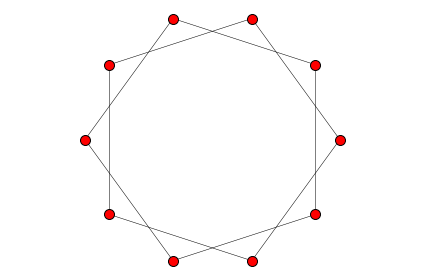

In [38]:
Q = 10
G = ring_graph(Q)
plot_graph(G)

plot_graph(complement_graph(G))
plot_graph(star_graph(Q))


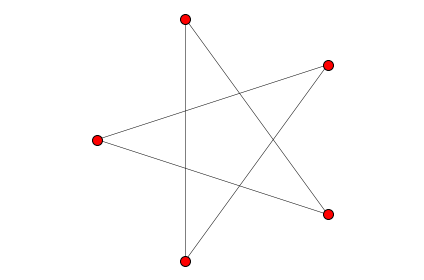

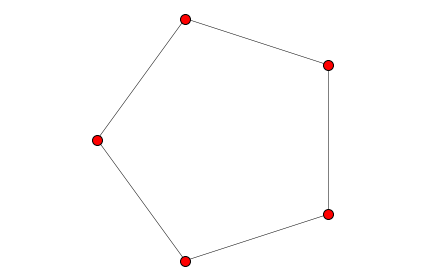

In [39]:
Q = 5
G = star_graph(Q)

plot_graph(G)
plot_graph(line_graph(G))


In [40]:
Q = 3

Lmax = comb(Q, 2)
Ngraphs = 2 ** Lmax
Nfact = factorial(Q)

print(Lmax)
print(Ngraphs)
print(Nfact)
print(Ngraphs / Nfact)


3
8
6
1.3333333333333333


[LOG]: Saved figure to ./figs/random/erdos-renyi-spectrum-100.pdf


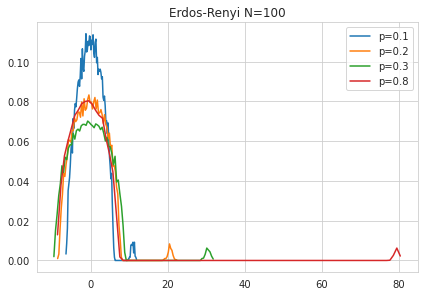

In [41]:
N = 100
for p in [0.1, 0.2, 0.3, 0.8]:
    plot_graph_spectrum(erdos_renyi_graph, N=N, p=p, label=f"p={p}")
plt.legend()
plt.title(f"Erdos-Renyi N={N}")
savefig(f"erdos-renyi-spectrum-{N}.pdf", "figs", "random")


[LOG]: Saved figure to ./figs/random/small-world-100-3.pdf


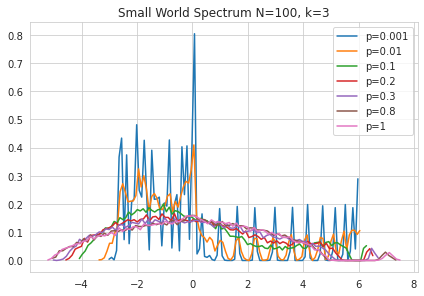

In [42]:
N  = 100
k = 3


for p in [0.001, 0.01, 0.1, 0.2, 0.3, 0.8, 1]:
    plot_graph_spectrum(small_world_graph, N=N, k=k, p=p, label=f"p={p}")
plt.legend()
plt.title(f"Small World Spectrum N={N}, k={k}")
savefig(f"small-world-{N}-{k}.pdf", "figs", "random")


[LOG]: Saved figure to ./figs/random/barabas-albert-spectrum-100.pdf


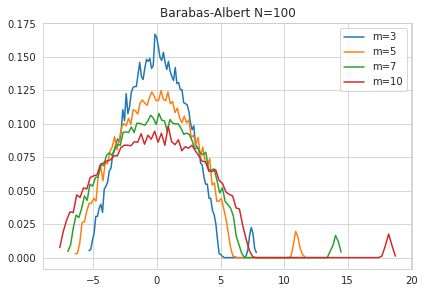

In [43]:
N = 100
for m in [3, 5, 7, 10]:
    plot_graph_spectrum(barabasi_albert_graph, N=N, m=m, label=f"m={m}")
plt.legend()
plt.title(f"Barabas-Albert N={N}")
savefig(f"barabas-albert-spectrum-{N}.pdf", "figs", "random")
